# IRIS FLOWER CLASSIFICATION

The Iris flower dataset comprises three distinct species: Setosa, Versicolor, and Virginica. These species can be differentiated by their sepal and petal measurements. The objective is to utilize the Iris dataset for the development of a model capable of classifying Iris flowers into their respective species by analyzing their sepal and petal measurements.

# Steps follwed 

 -  Import The Libraries 
 -  Data cleaning and preparation
 -  Visualization
 -  Split the data into Training and Testing
 -  Model building
 -  Conclustion

# Import The Libraries 

In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes =True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IRIS.csv')
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data cleaning and preparation


- Checking and removing duplicate values:
In this step, we identify and remove any duplicate entries in the dataset to ensure that each observation is unique. Duplicate values can distort the analysis and lead to inaccurate results.

- Check for missing values and treat them:
Missing values are instances where data is not recorded for certain variables. It is essential to identify and handle these missing values appropriately. Common methods for handling missing data include imputation (replacing missing values with estimated values) or deletion (removing rows or columns with missing data).

- Check for outliers and treat them:
Outliers are extreme values that deviate significantly from the rest of the data. Outliers can skew the analysis and affect the model's performance. Identifying and treating outliers can involve methods like capping (replacing extreme values with a predetermined limit) or transformation (applying mathematical functions to normalize the data).

## Check for missing values 

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

In [8]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
8,4.4,2.9,1.4,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica
15,5.7,4.4,1.5,0.4,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa


# Visualization

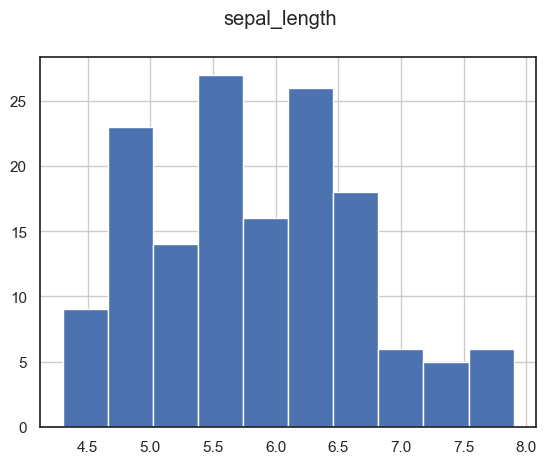

In [9]:
col1 = 'sepal_length'
df[col1].hist()
plt.suptitle(col1) 
plt.show()

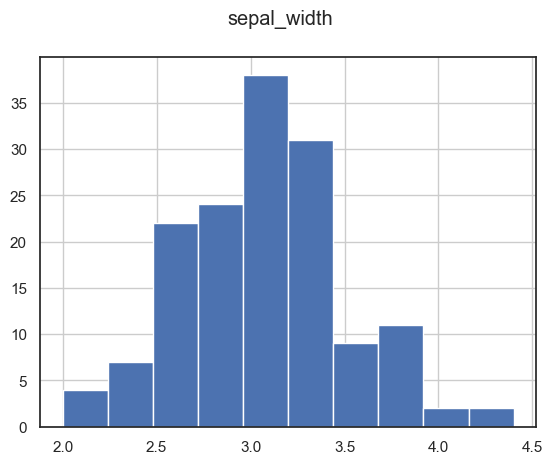

In [10]:
col2 = 'sepal_width'
df[col2].hist()
plt.suptitle(col2) 
plt.show()

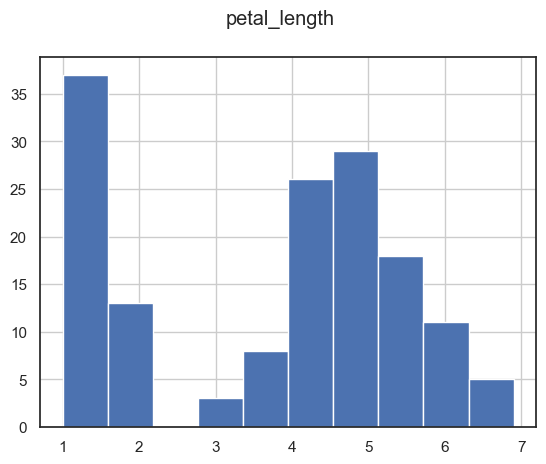

In [11]:
col3 = 'petal_length'
df[col3].hist()
plt.suptitle(col3) 
plt.show()

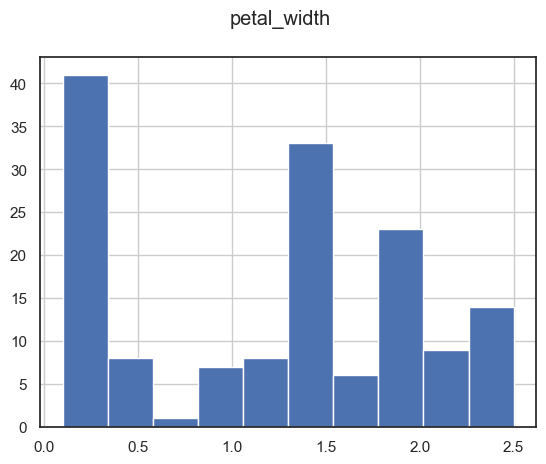

In [12]:
col4 = 'petal_width'
df[col4].hist()
plt.suptitle(col4) 
plt.show()

# Relationship between columns and species

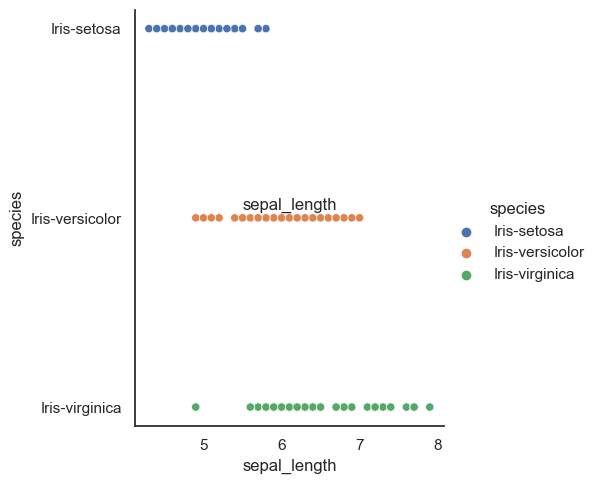

In [13]:
col1 = 'sepal_length'
sns.relplot(x=col1, y='species', hue='species', data=df)  
plt.title(col1, y=0.5)  
plt.show()

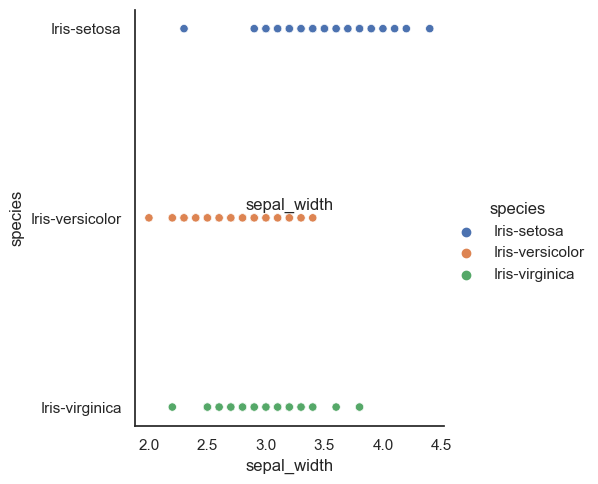

In [14]:
col2 = 'sepal_width'
sns.relplot(x=col2, y='species', hue='species', data=df)  
plt.title(col2, y=0.5)  
plt.show()

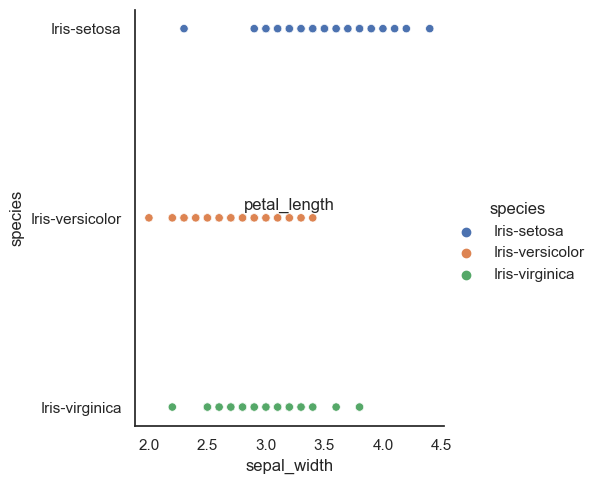

In [15]:
col3 = 'petal_length'
sns.relplot(x=col2, y='species', hue='species', data=df)  
plt.title(col3, y=0.5)  
plt.show()

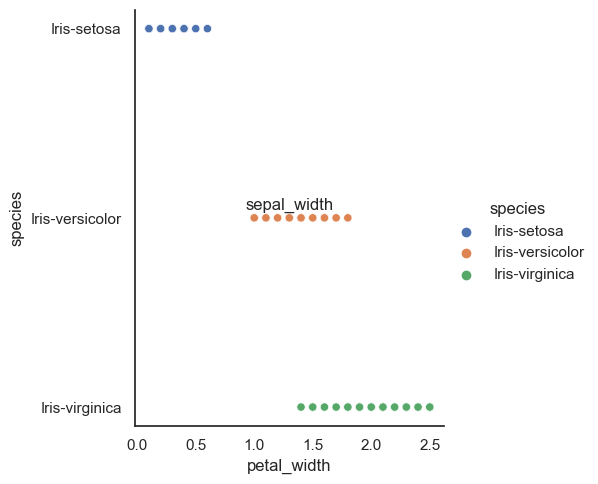

In [16]:
col4 = 'petal_width'
sns.relplot(x=col4, y='species', hue='species', data=df)  
plt.title(col2, y=0.5)  
plt.show()

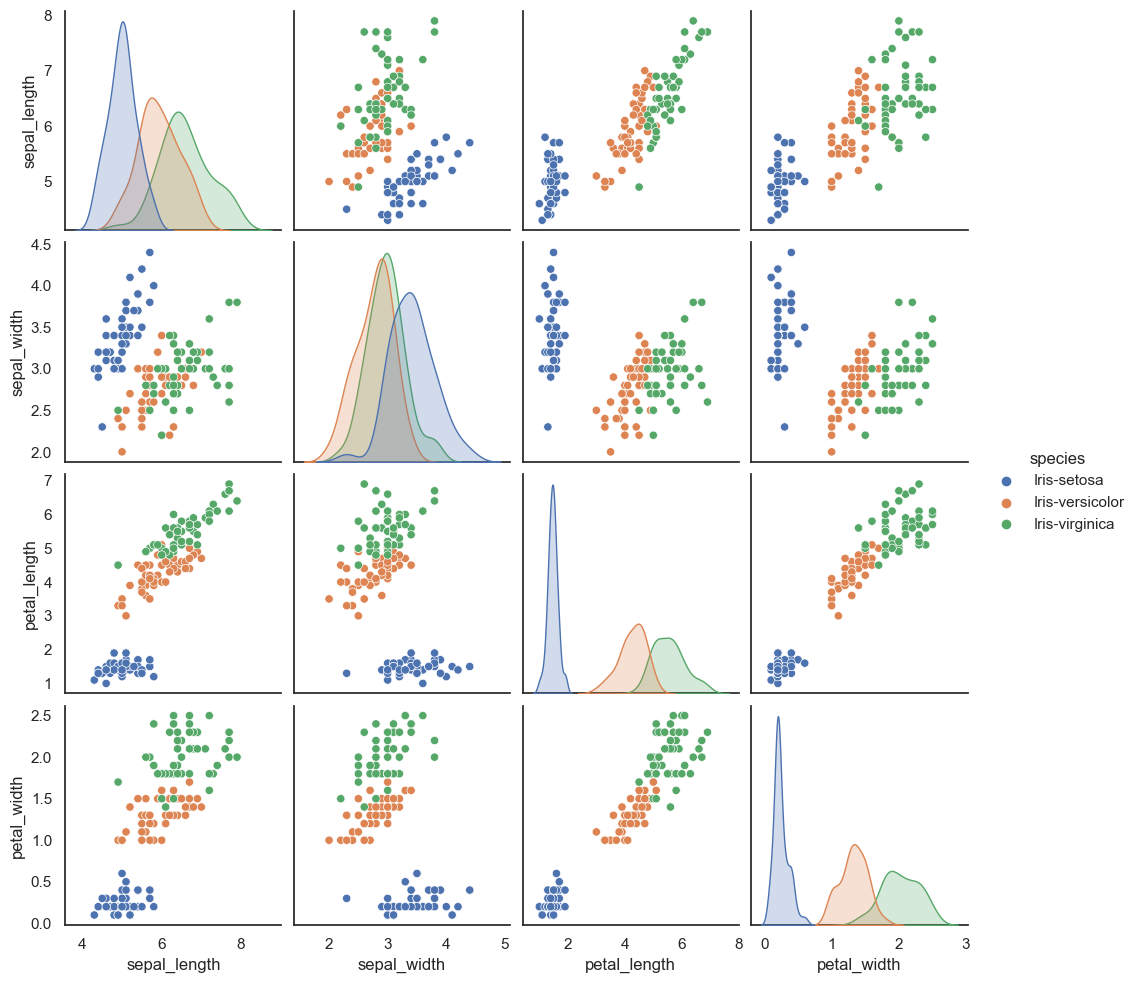

In [17]:
sns.pairplot(df,hue='species')

#  Split the data into Training and Testing

In [18]:
from  sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [19]:
le = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
from sklearn.model_selection import train_test_split
df_train,df_test =train_test_split(df,test_size =0.25)

In [21]:
df_train.shape

(112, 5)

In [22]:
df_test.shape

(38, 5)

# Model building

In [23]:
x_train = df_train.drop(columns=["species"]).values

In [24]:
x_train

array([[7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [6. , 2.9, 4.5, 1.5],
       [5. , 3.5, 1.3, 0.3],
       [6.5, 3. , 5.8, 2.2],
       [5.4, 3.7, 1.5, 0.2],
       [5.6, 3. , 4.1, 1.3],
       [5. , 3. , 1.6, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [6.3, 2.9, 5.6, 1.8],
       [5.7, 2.8, 4.5, 1.3],
       [4.8, 3. , 1.4, 0.3],
       [7.1, 3. , 5.9, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [5.8, 2.7, 3.9, 1.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.7, 3.1, 4.7, 1.5],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.1, 3.5, 1.4, 0.3],
       [6.3, 2.5, 4.9, 1.5],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 3.1, 5.5, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [6.6, 3. , 4.4, 1.4],
       [6.3, 3.3, 4.7, 1.6],
       [5. , 3.4, 1.6, 0.4],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.7, 4.9, 1.8],
       [5.5, 2.3, 4. , 1.3],
       [5.8, 2

In [25]:
y_train =df_train["species"].values


In [26]:
train, test= train_test_split(df,test_size= 0.25)
print(train.shape)
print(test.shape) 

(112, 5)
(38, 5)


In [27]:
x_test = df_test.drop(columns=['species']).values
y_test = df_test['species'].values

In [28]:
x_test.shape

(38, 4)

# Logistic Reggression

In [29]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
model = LogisticRegression(max_iter=1000)

In [31]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [32]:
prediction = model.predict(x_test)
print('Accuracy:',accuracy_score(prediction,y_test))

Accuracy: 0.9736842105263158


# Confusion matrix

In [33]:
from sklearn.metrics import  confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat) 
print(classification_report(y_test,prediction)) 

Confusion matrix: 
 [[12  0  0]
 [ 0 11  0]
 [ 0  1 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# KNN Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5) 
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test) 
from sklearn.metrics import accuracy_score
print("'Accuracy Score:", accuracy_score(y_test,y_pred2))

'Accuracy Score: 0.9736842105263158


# Decision tree

In [35]:
from sklearn import tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
 from sklearn.metrics import accuracy_score

prediction_dt = dt_model.predict(x_test)
accuracy_dt = accuracy_score (y_test,prediction_dt)

In [38]:
accuracy_dt

0.9736842105263158

In [39]:


results = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Score': [0.97, 0.97, 0.97]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,model
Score,
0.97,Logistic Regression
0.97,KNN
0.97,Decision Tree


In [40]:
from sklearn.model_selection import cross_val_score 
scores= cross_val_score(dt_model,x_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores) 
rmse_scores 

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [41]:
y_test

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [42]:
prediction_dt

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

## creating the category 

In [43]:
category =['setosa','versicolor','virginica']

In [44]:
data= 5.7,3.4,4.2,1.1

In [45]:
data_array = np.array([data])
data_array

array([[5.7, 3.4, 4.2, 1.1]])

In [46]:
predict =dt_model.predict(data_array)

In [47]:
print(predict[0])

Iris-versicolor


# Input from user

In [48]:
sepal_length = float(input("Enter Sepal Length :"))
sepal_width = float(input("Enter Sepal Width:"))
petal_length = float(input("Enter Petal Length :"))
petal_width = float(input("Enter Petal Width :"))


# convert user input into Numpy array
input_data =np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# use the trained model to predict the species of flower
predicted_species = dt_model.predict(input_data)

 # Display the predicted species to the user
print( "Predicted Species:", predicted_species[0])

Enter Sepal Length :5
Enter Sepal Width:3.6
Enter Petal Length :1
Enter Petal Width :1.2
Predicted Species: Iris-versicolor


# Conclusion


throughout our analysis, we observed that the various species of Iris flowers display discernible characteristics concerning sepal and petal measurements. By employing machine learning algorithms such as Logistic Regression, Decision Trees, and K-Nearest Neighbors (KNN) classification, we successfully constructed models capable of precisely classifying Iris flowers into their respective species based on these measurements. The dataset's features, including Sepal Length (in centimeters), Sepal Width (in centimeters), Petal Length (in centimeters), and Petal Width (in centimeters), were crucial in enabling the accurate differentiation of Iris flower species. Our results highlight the effectiveness of machine learning techniques in automating species classification based on morphological attributes, contributing to the fields of botany, ecology, and beyond.